<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [3]:
# import the pacakges
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# to split the datasets
from sklearn.model_selection import train_test_split

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

### Step 1: Load Data into Jupyter Notebook

In [4]:
#load data into into dataframe
df = pd.read_csv("song_popularity.csv")

#display first 5 rows
print("Head of the DataFrame:")
df.head()

Head of the DataFrame:


,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90


In [5]:
#display songdata's information (columns, data types, non-null values, memory usage)
print("Info about the DataFrame:")
df.info()

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularit

In [6]:
# Display summary statistics for numerical columns
print("Description of the DataFrame:")
df.describe()

Description of the DataFrame:


,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,Decibel,Song_Popularity,Indicator
count,1.883500e+04,18835.000000,15938.000000,18835.000000,18835.000000,18835.000000,18835.000000,13184.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,2.182116e+05,0.253368,0.626669,64.499476,0.078008,5.289196,0.628139,152.173475,121.073154,0.527967,-7.447435,42.357670,96.749215
std,5.988754e+04,0.282945,0.155086,21.410076,0.221591,3.614595,0.483314,155.018531,28.714456,0.244632,3.827831,13.949829,32.115110
min,1.200000e+04,0.000001,0.000000,0.107000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-38.768000,0.000000,0.160000
25%,1.843395e+05,0.023618,0.526680,51.000000,0.000000,2.000000,0.000000,56.700000,98.368000,0.335000,-9.044000,32.790000,76.500000
50%,2.113060e+05,0.129360,0.636570,67.400000,0.000011,5.000000,1.000000,83.250000,120.013000,0.527000,-6.555000,42.730000,101.100000
75%,2.428440e+05,0.415520,0.740520,81.500000,0.002570,8.000000,1.000000,177.000000,139.931000,0.725000,-4.908000,52.290000,122.250000
max,1.799346e+06,0.976080,0.977130,99.900000,0.997000,11.000000,1.000000,1410.000000,242.318000,0.984000,1.585000,99.320000,149.850000


In [7]:
# Display the shape of the DataFrame (number of rows and columns)
print("\nShape of the DataFrame:")
print(df.shape)


Shape of the DataFrame:
(18835, 18)


In [8]:
# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
Code                   0
Song_Name              0
Song_Duration_ms       0
Acousticness           0
Danceability        2897
Energy                 0
Instrumentalness       0
Key                    0
Liveness               0
Audio_mode             0
Speechiness         5651
Tempo                  0
Audio_valence          0
Dynamism            3698
Decibel                0
Loudness               0
Song_Popularity        0
Indicator              0
dtype: int64


In [9]:
# find the categorical variables
cat_cols = [c for c in df.columns if df[c].dtypes=='O']
df[cat_cols].isnull().mean().sort_values()

Code         0.000000
Song_Name    0.000000
Liveness     0.000000
Loudness     0.000000
Dynamism     0.196337
dtype: float64

### Step 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Quantifying missing data')

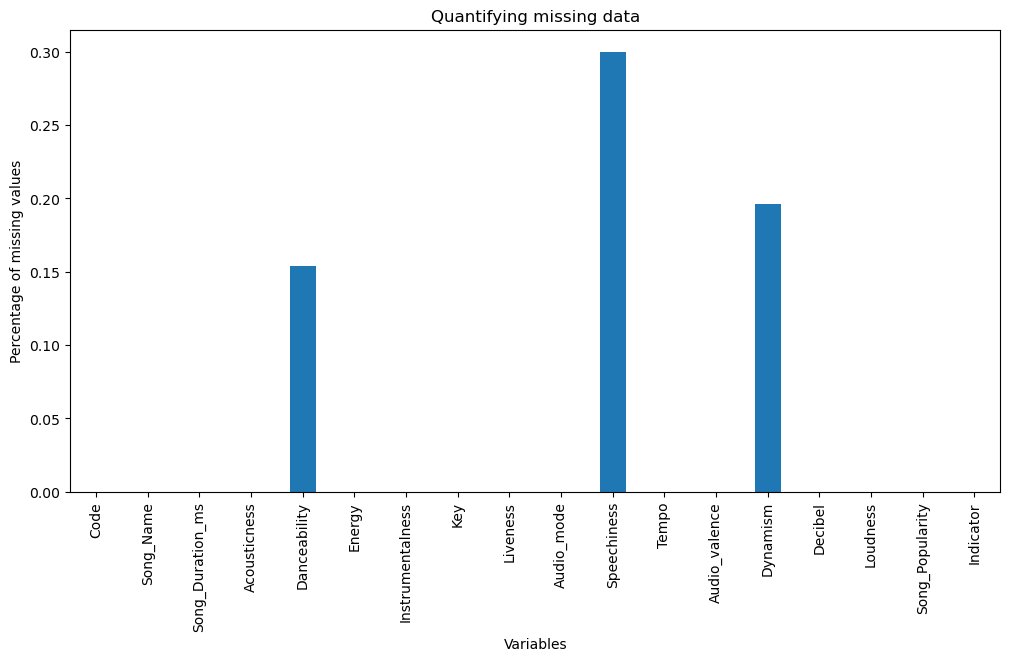

In [10]:
# plot the percentages of missing data utilising
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

Text(0.5, 1.0, 'Cardinality')

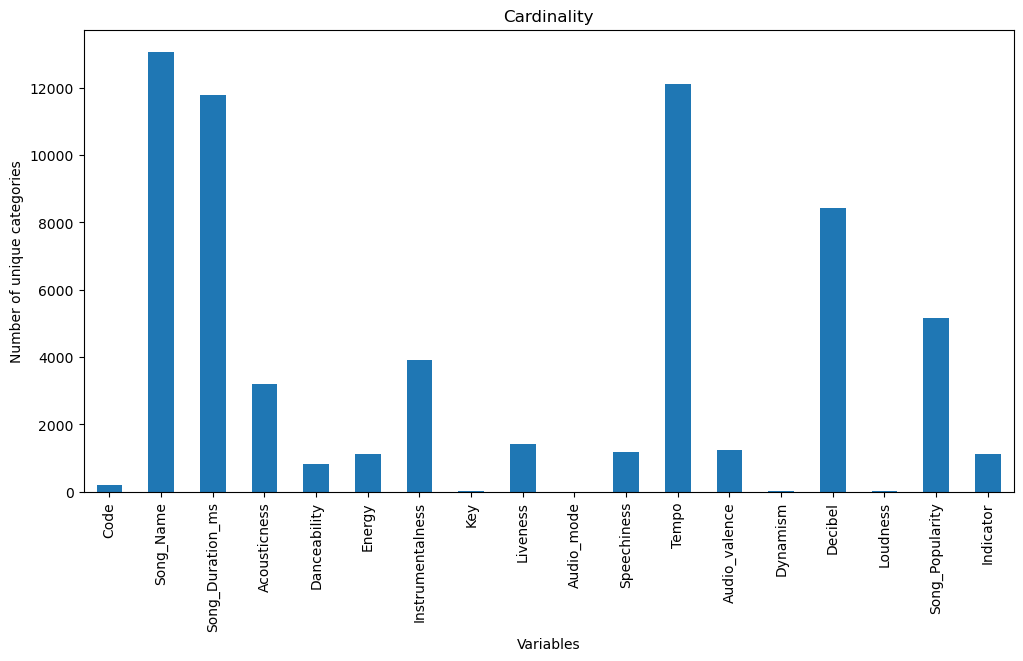

In [11]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

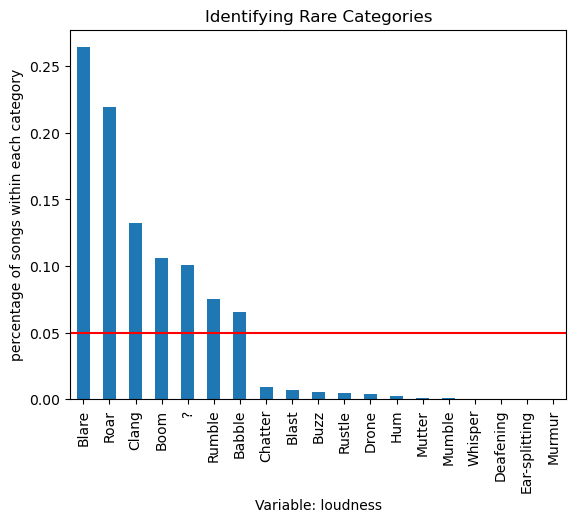

In [12]:
total_song = len(df)
# calculate label frequency
label_freq = df['Loudness'].value_counts() / total_song

# let's make plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar()

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('percentage of songs within each category')
fig.set_xlabel('Variable: loudness')
fig.set_title('Identifying Rare Categories')
plt.show()

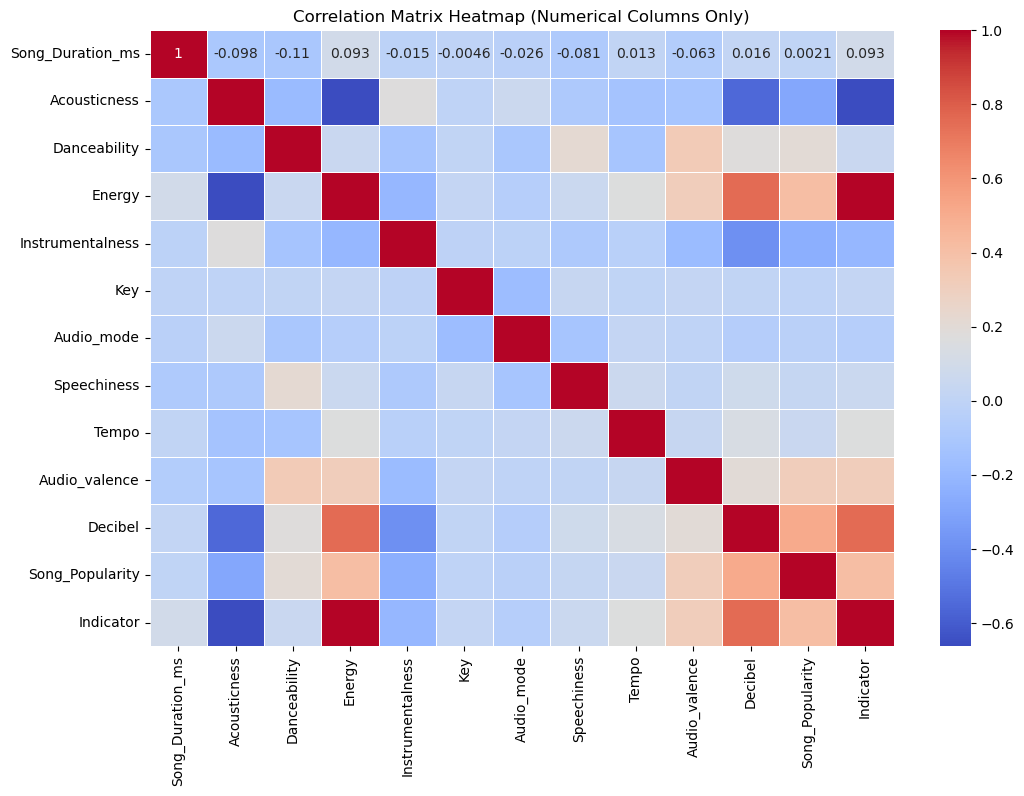

In [13]:
# Select only numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = df[num_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Numerical Columns Only)')
plt.show()

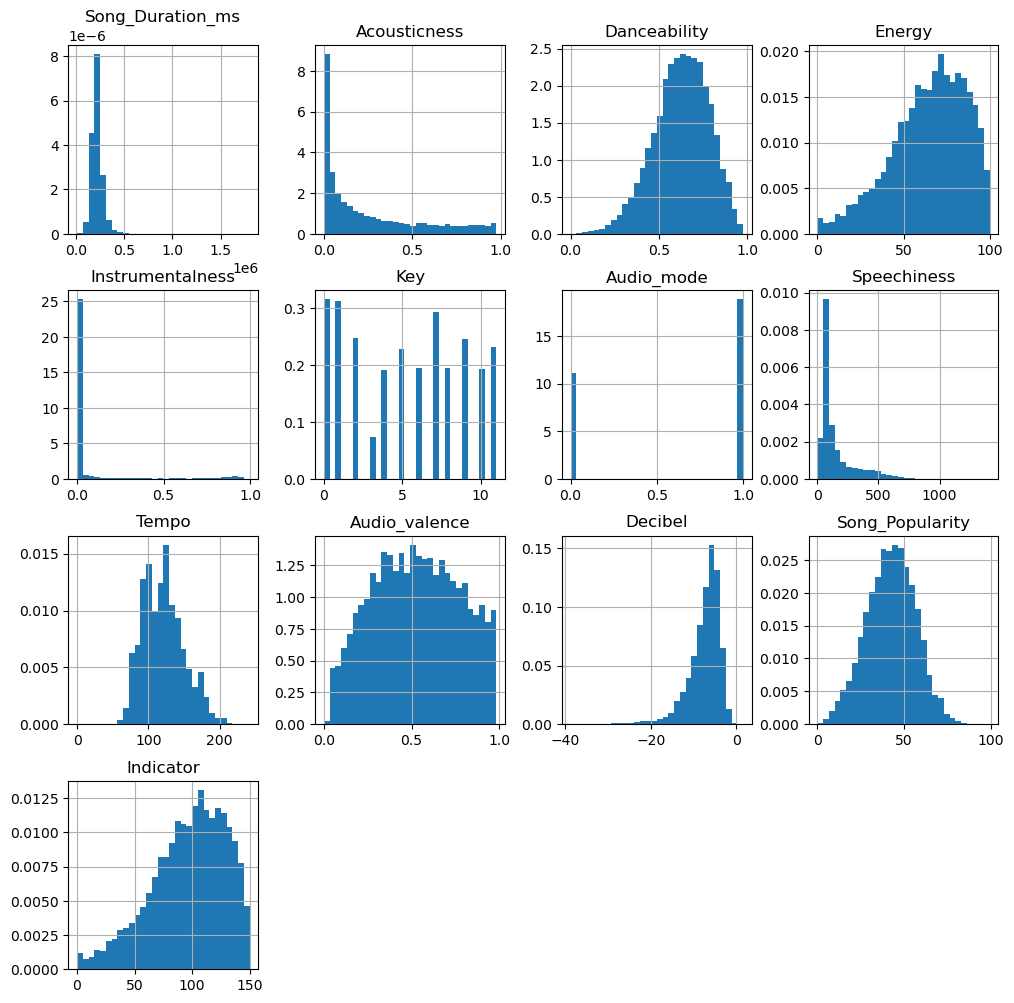

In [14]:
df.hist(bins=30, figsize=(12,12), density=True)
plt.show()

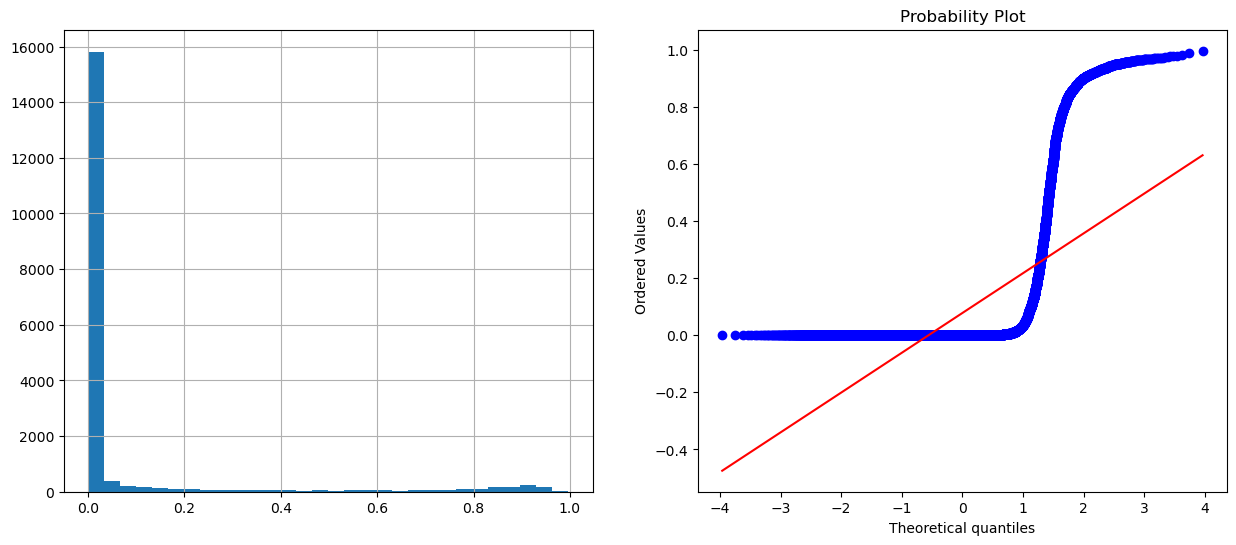

In [15]:
# Plot histogram and Q-Q plots for variable Instrumentalness
# to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

diagnostic_plots(df, 'Instrumentalness')

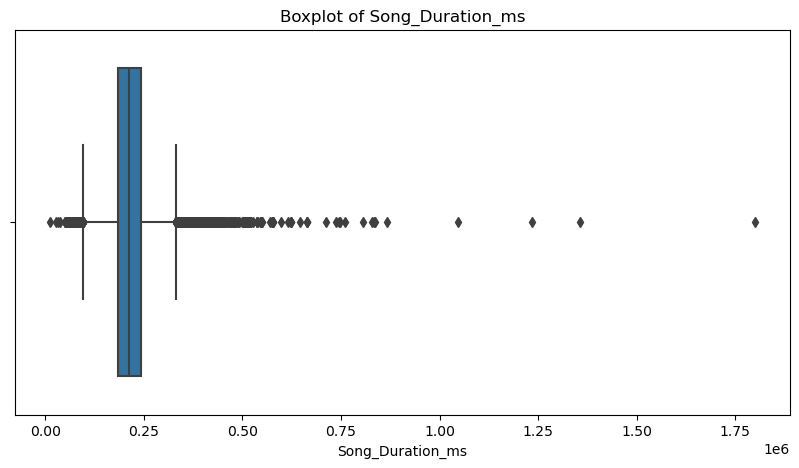

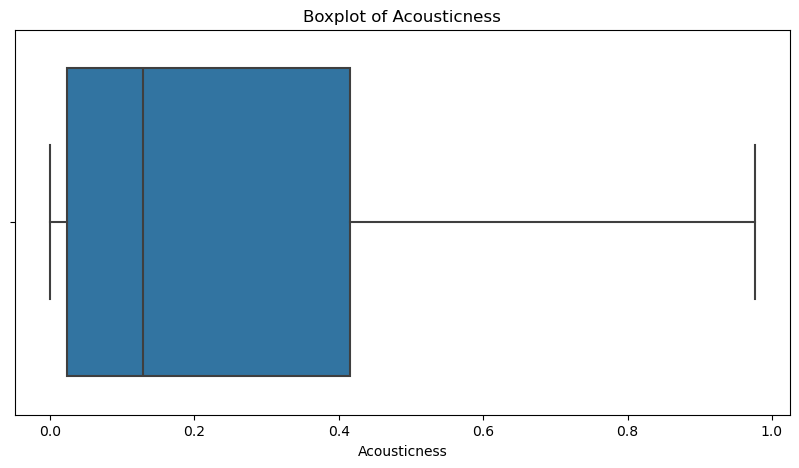

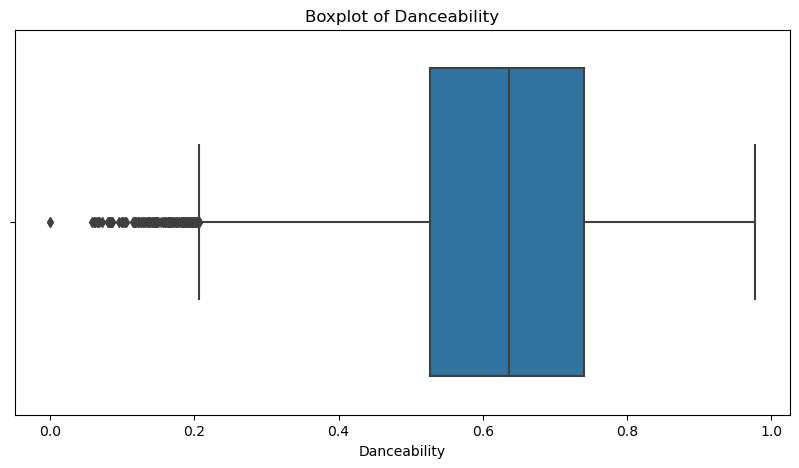

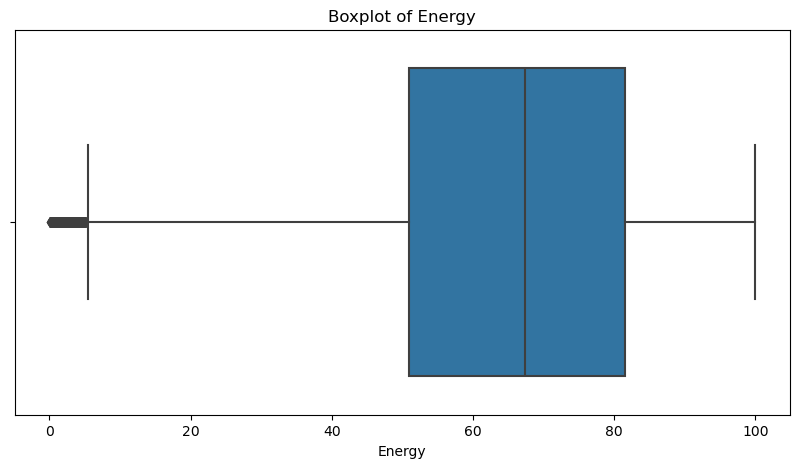

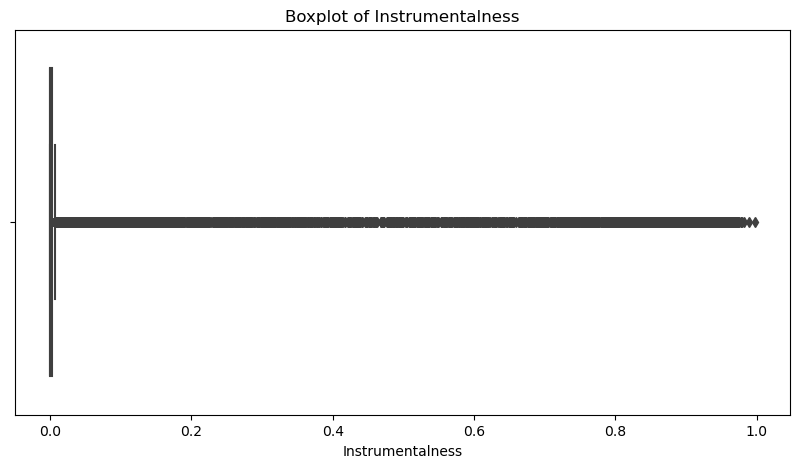

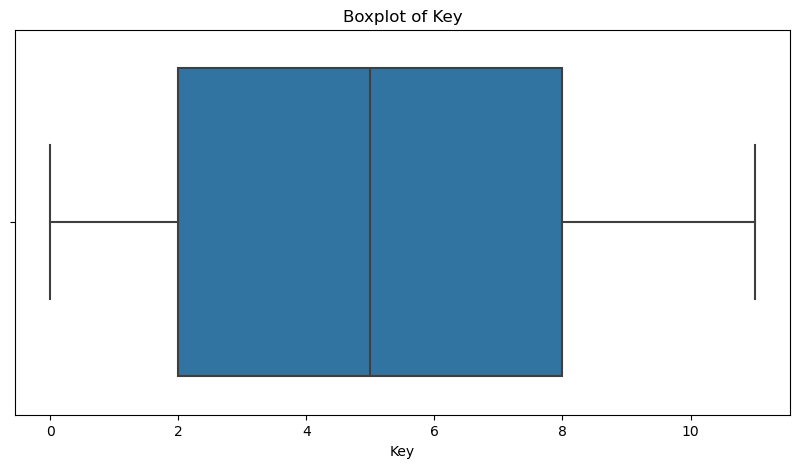

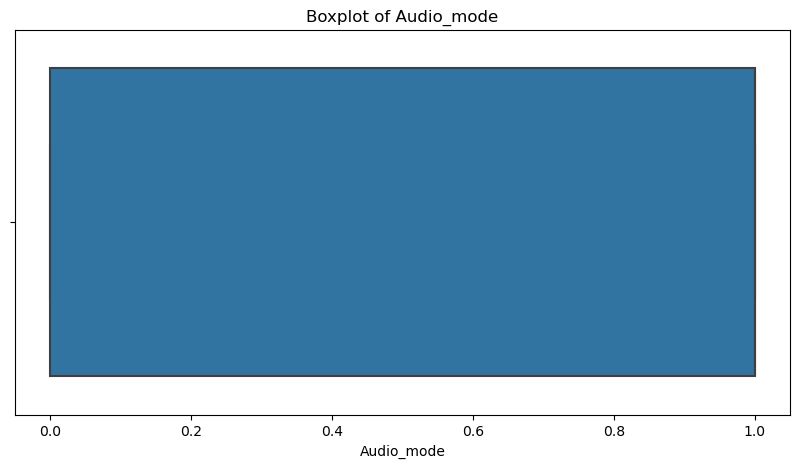

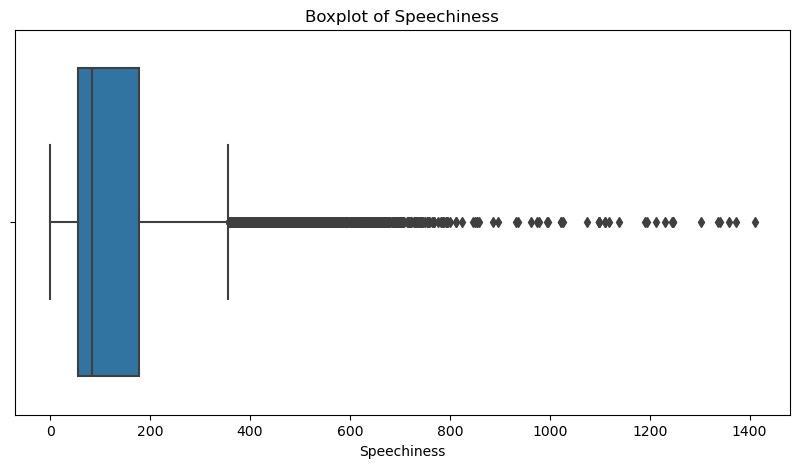

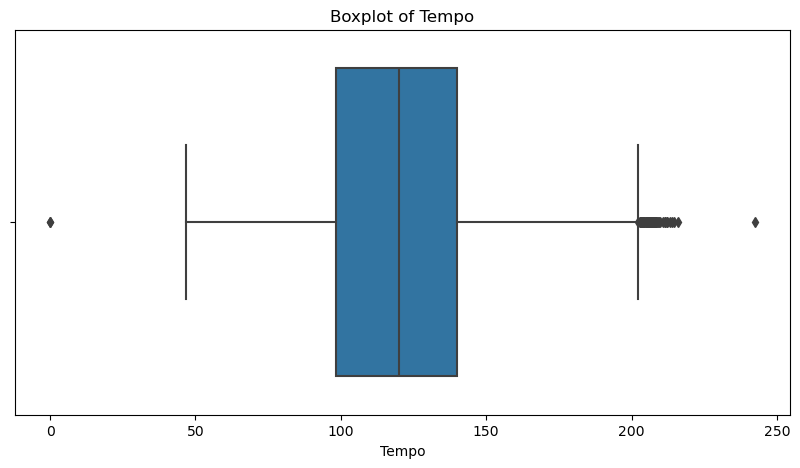

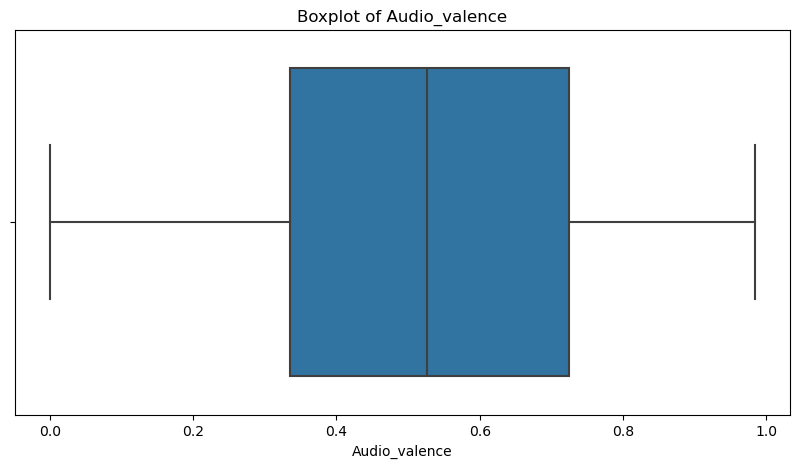

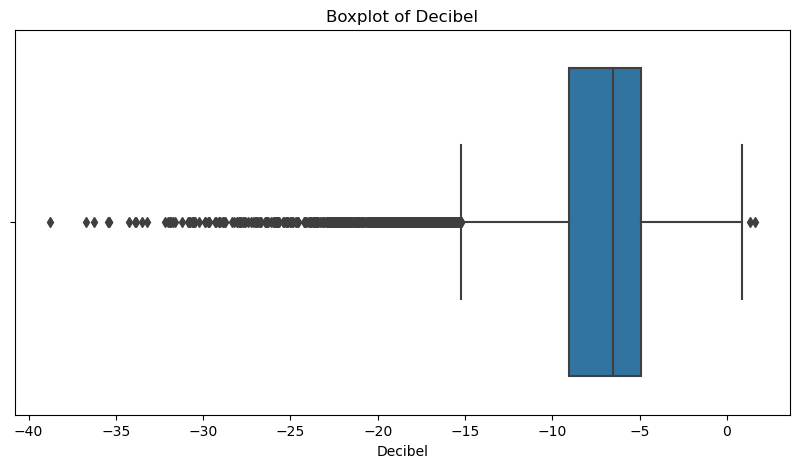

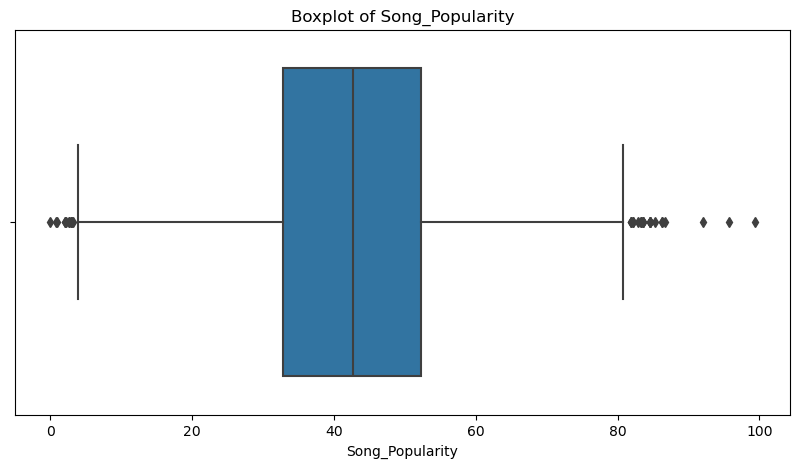

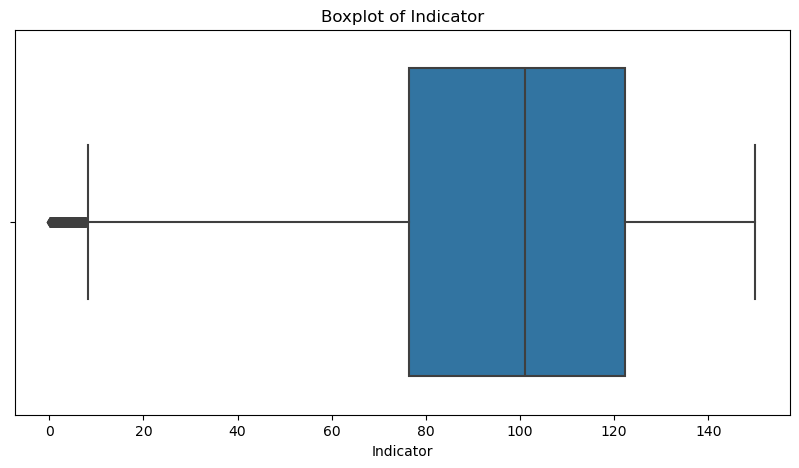

In [16]:
# Boxplots to check for outliers
for column in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

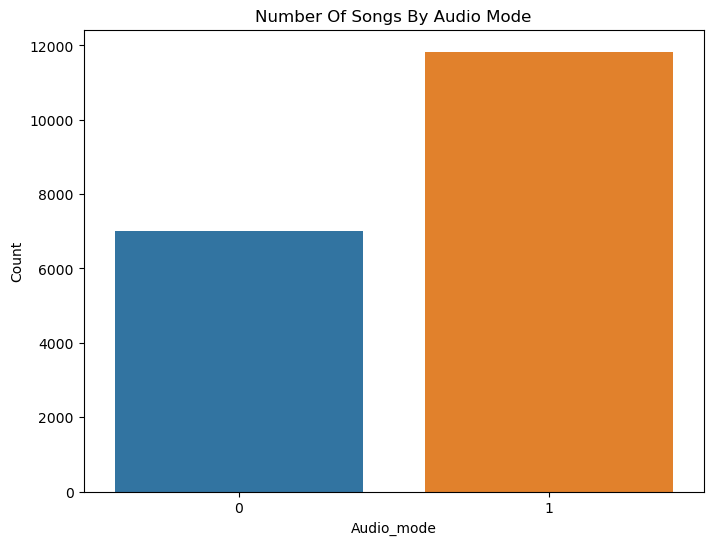

In [17]:
# Plot the count of songs by audio mode
plt.figure(figsize=(8, 6))
sns.countplot(x='Audio_mode', data=df)
plt.title('Number Of Songs By Audio Mode')
plt.ylabel('Count')
plt.show()

C:\Users\Henry Lim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 800x400 with 0 Axes>

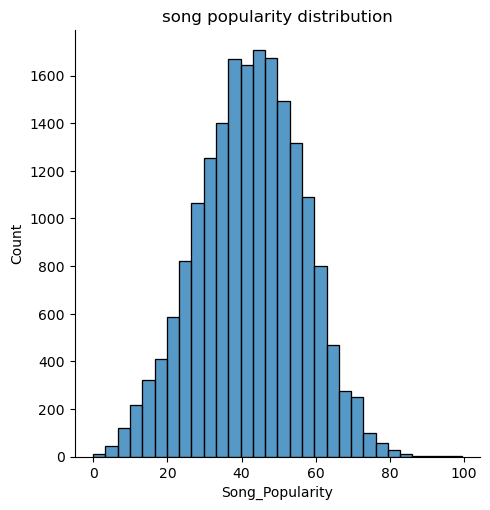

In [18]:
plt.figure(figsize=[8,4])
sns.displot(df['Song_Popularity'], bins=30)
plt.title('song popularity distribution')
plt.show()

### Step 3: Data Preprocessing

In [19]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [20]:
# find limits for Danceability

Danceability_upper_limit, Danceability_lower_limit = find_boundaries(df, 'Danceability', 1.5)
Danceability_upper_limit, Danceability_lower_limit

(1.0612799999999998, 0.20592000000000016)

In [21]:
# find limits for Energy

Energy_upper_limit, Energy_lower_limit = find_boundaries(df, 'Danceability', 1.5)
Energy_upper_limit, Energy_lower_limit

(1.0612799999999998, 0.20592000000000016)

In [22]:
# find limits for Tempo

Tempo_upper_limit, Tempo_lower_limit = find_boundaries(df, 'Tempo', 1.5)
Tempo_upper_limit, Tempo_lower_limit

(202.27550000000002, 36.02349999999997)

In [23]:
# find limits for Decibel

Decibel_upper_limit, Decibel_lower_limit = find_boundaries(df, 'Decibel', 1.5)
Decibel_upper_limit, Decibel_lower_limit

(1.2960000000000003, -15.248000000000001)

In [24]:
# find limits for Song_Popularity

Song_Popularity_upper_limit, Song_Popularity_lower_limit = find_boundaries(df, 'Song_Popularity', 1.5)
Song_Popularity_upper_limit, Song_Popularity_lower_limit

(81.53999999999999, 3.539999999999999)

In [25]:
# let's flag the outliers in the data set

outliers_Danceability = np.where(df['Danceability'] > Danceability_upper_limit, True,
                       np.where(df['Danceability'] < Danceability_lower_limit, True, False))

In [26]:
# let's flag the outliers in the data set

outliers_Energy = np.where(df['Energy'] > Energy_upper_limit, True,
                       np.where(df['Energy'] < Energy_lower_limit, True, False))

In [27]:
# let's flag the outliers in the data set

outliers_Tempo = np.where(df['Tempo'] > Tempo_upper_limit, True,
                       np.where(df['Tempo'] < Tempo_lower_limit, True, False))

In [28]:
# let's flag the outliers in the data set

outliers_Decibel = np.where(df['Decibel'] > Decibel_upper_limit, True,
                       np.where(df['Decibel'] < Decibel_lower_limit, True, False))

In [29]:
# let's flag the outliers in the data set

outliers_Song_Popularity = np.where(df['Song_Popularity'] > Song_Popularity_upper_limit, True,
                       np.where(df['Song_Popularity'] < Song_Popularity_lower_limit, True, False))

In [30]:
# let's trim the dataset by removing outliers_Song_Popularity + outliers_Danceability + outliers_Tempo + outliers_Decibel

df_trimmed = df.loc[~(outliers_Song_Popularity + outliers_Danceability + outliers_Tempo + outliers_Decibel) ]

df.shape, df_trimmed.shape

((18835, 18), (17983, 18))

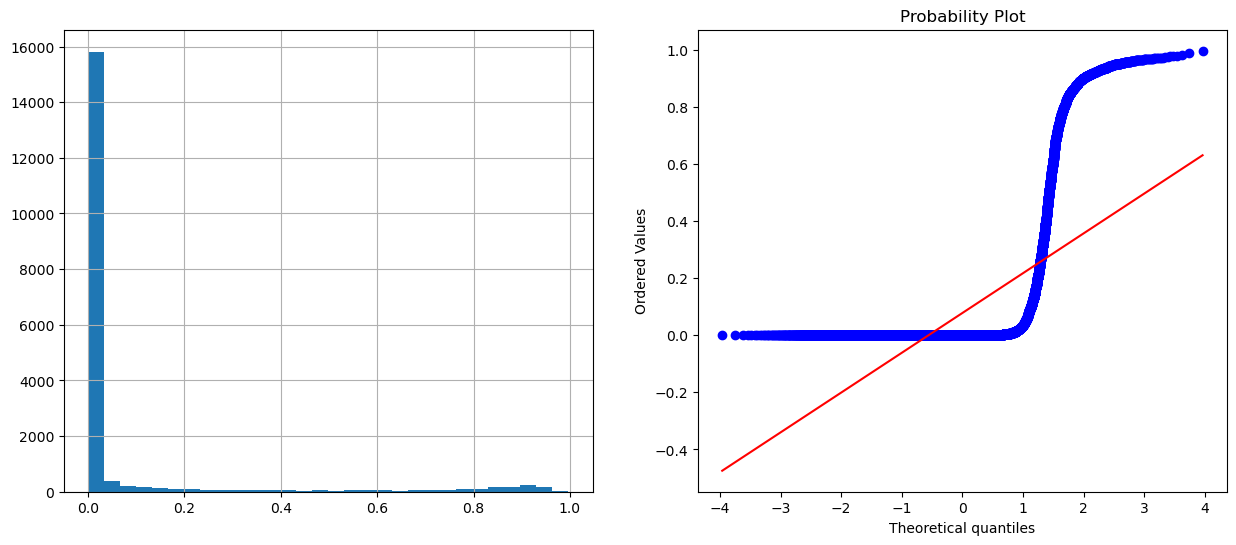

In [31]:
# Plot histogram and Q-Q plots for variable Instrumentalness
# to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

diagnostic_plots(df, 'Instrumentalness')

In [32]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
cols = ['Instrumentalness']
transformer.fit(df_trimmed[cols])

PowerTransformer(standardize=False)

In [33]:
transformer.lambdas_

df_tf = transformer.transform(df_trimmed[cols])

df_tf = pd.DataFrame(df_tf, columns=cols)

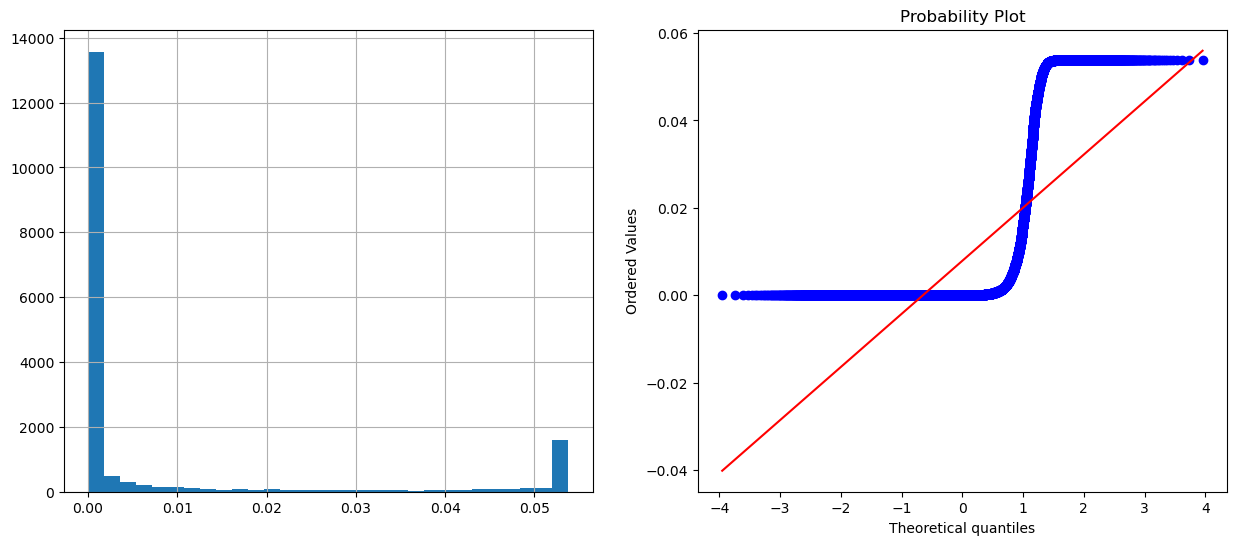

In [34]:
# Task 6: plot histogram and Q-Q plots for variables (after transformation): 
# minimum_nights & number_of_reviews 
diagnostic_plots(df_tf, 'Instrumentalness')

### Step 4: Train and Test Split

In [35]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Song_Name', 'Code', 'Song_Popularity'], axis=1),  # predictors
    df['Song_Popularity'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((13184, 15), (5651, 15))

In [36]:
y_train.shape, y_test.shape

((13184,), (5651,))

### Step 5: Missing Value Imputation

In [37]:
missing_percentage = (X_train.isnull().mean() * 100)
 
missing_percentage

Song_Duration_ms     0.000000
Acousticness         0.000000
Danceability        15.458131
Energy               0.000000
Instrumentalness     0.000000
Key                  0.000000
Liveness             0.000000
Audio_mode           0.000000
Speechiness         29.846784
Tempo                0.000000
Audio_valence        0.000000
Dynamism            19.500910
Decibel              0.000000
Loudness             0.000000
Indicator            0.000000
dtype: float64

In [38]:
for var in ['Danceability', 'Speechiness']:

    value = X_train[var].median()
    print(value)

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)

0.63756
83.55


In [39]:
for var in ['Dynamism']:
    
    value = X_train[var].mode()[0]

    X_train[var] = X_train[var].fillna(value)
    X_test[var] = X_test[var].fillna(value)
    print(value)

Hi


In [40]:
pd.DataFrame(X_train).isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

### Step 6: Categorical Data Encoding

In [41]:
# find the categorical variables
cat_cols = [c for c in X_train.columns if X_train[c].dtypes == 'O']
X_train[cat_cols].isnull().mean().sort_values()

Liveness    0.0
Dynamism    0.0
Loudness    0.0
dtype: float64

In [42]:
# Encode X_train & X_test using One-Hot-Encoding
# let's create the encoder
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

In [43]:
ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True)

In [44]:
ohe_enc.variables

In [45]:
# let's transform train and test set
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

X_train_enc.head()

,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Audio_mode,Speechiness,Tempo,Audio_valence,...,Loudness_Buzz,Loudness_Hum,Loudness_Blast,Loudness_Rustle,Loudness_Deafening,Loudness_Chatter,Loudness_Drone,Loudness_Mumble,Loudness_Mutter,Loudness_Whisper
4659,200133,0.296940,0.71874,70.80,0.00000,7,0,534.00,105.084,0.417,...,0,0,0,0,0,0,0,0,0,0
4389,243306,0.048706,0.63756,58.90,0.00000,1,1,204.00,95.029,0.159,...,0,0,0,0,0,0,0,0,0,0
10549,145411,0.629160,0.65637,53.10,0.00412,9,1,67.80,140.657,0.531,...,0,0,0,0,0,0,0,0,0,0
11105,153600,0.886900,0.76230,1.61,0.91400,4,1,83.55,75.047,0.700,...,0,0,0,0,0,0,0,0,0,0
3183,206946,0.223440,0.56430,57.60,0.00000,1,1,94.65,143.943,0.438,...,0,0,0,0,0,0,0,0,0,0


### Step 7: Variable Discretization /Binning

In [46]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['Instrumentalness', 'Speechiness', 'Decibel'], return_object=True)

disc.fit(X_train_enc)

EqualFrequencyDiscretiser(return_object=True,
                          variables=['Instrumentalness', 'Speechiness',
                                     'Decibel'])

In [47]:
disc.binner_dict_

{'Instrumentalness': [-inf,
  1.52e-06,
  1.12e-05,
  9.08800000000001e-05,
  0.0007993999999999942,
  0.009758000000000029,
  0.248,
  inf],
 'Speechiness': [-inf, 49.5, 59.55, 73.5, 83.55, 98.25, 153.0, 313.5, inf],
 'Decibel': [-inf,
  -12.0784,
  -9.7524,
  -8.334,
  -7.377,
  -6.542,
  -5.867199999999999,
  -5.237,
  -4.586,
  -3.7275999999999985,
  inf]}

In [48]:
# transform train and test sets

train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

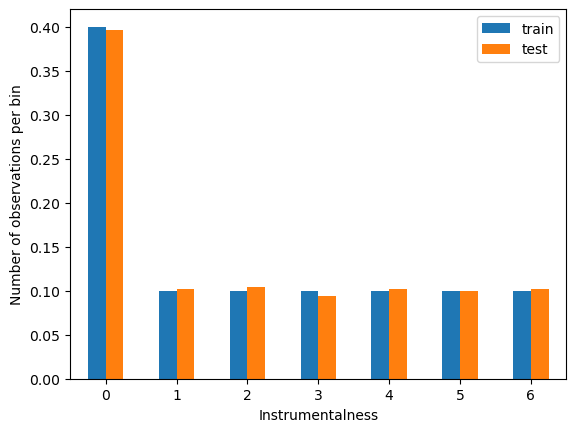

In [49]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Instrumentalness
# calculate proportion of observations per interval
t1 = train_t.groupby(['Instrumentalness'])['Instrumentalness'].count() / len(train_t)
t2 = test_t.groupby(['Instrumentalness'])['Instrumentalness'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

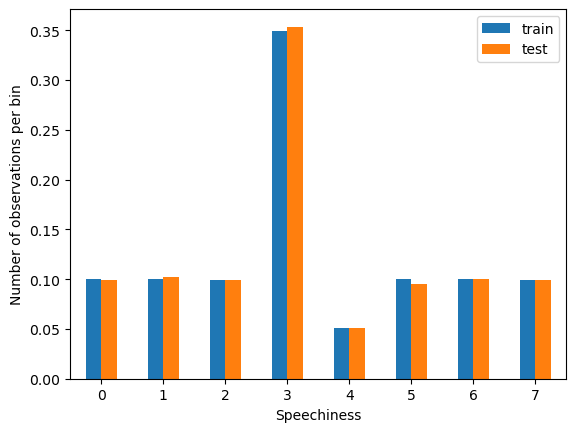

In [50]:
# Speechiness

t1 = train_t.groupby(['Speechiness'])['Speechiness'].count() / len(train_t)
t2 = test_t.groupby(['Speechiness'])['Speechiness'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

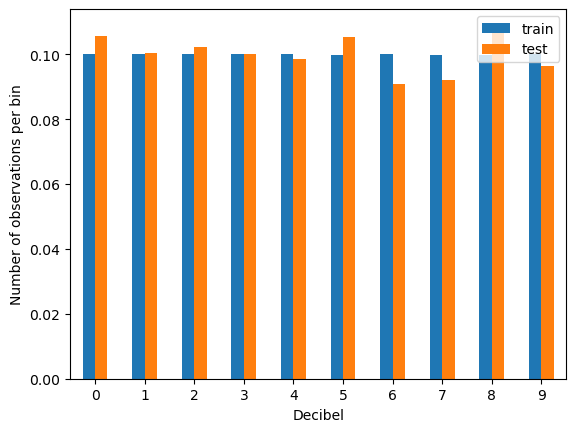

In [51]:
# Decibel

t1 = train_t.groupby(['Decibel'])['Decibel'].count() / len(train_t)
t2 = test_t.groupby(['Decibel'])['Decibel'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Step 8: Feature Engineer

In [52]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [53]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [54]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled

y_train_final = y_train
y_test_final = y_test

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 95.80678756660868 
 test_mse: 117.99237444267982
train_r-sq: 0.5067010097253365 
 test_r-sq: 0.39629797622754737


## Report

### Problem Understanding

Anticipating and predicting successful songs can create a large competitive edge in the current music industry. By predicting and focusing assets on popular songs, XYZ Music Records can create data-based decisions regarding fields such as budget allocation or marketing plans

The analysis aims to predict a song’s popularity based on its various attributes. This analysis will offer valuable insights to the management team, aiding them in optimizing their allocation of resources. By using Data Wrangling techniques like feature selection, model training and evaluation of performance, we can identify the factors that influence song popularity and offer a description behind the predictive power of the model. This highlights the importance of certain variables and how they affect song popularity

This can be achieved by finding correlations between certain data fields and song popularity. However, due to the incomplete nature of the dataset, data preprocessing should be conducted to find any outliers, unsatisfactory distribution of numerical variables and transformation needs. Missing values should also be handled along with categorical data encoding and discretization/binning of numerical data. Feature engineering may also need to be done to scale the data or dropping any features/variables. Finally, a linear regression model should be designed for XYZ model records.

Problem Statement: How can XYZ Music Records predict the popularity of a future song based on its attributes?


### Exploratory Data Analysis

#### Functions 

Using Functions such as .head() .info() .describe() .shape  isnull().sum() and finding categorical columns allows us to gain nsights on the dataset. The .head() function allows us to preview the first 5 rows, 

.info() provides a summary of number of columns (18), column names, non-null count (18835) for each column and datatypes, 

.describe() provides statistics like count, mean, standard deviation, minimum and maximum and quartiles

.shape allows us to view the amount of rows and columns(18835, 18) 

isnull().sum() allows us to view the sum of missing values per feature, thus allowing us to understand the distribution of the datase. There are 2897 missing values for Danceability, 5651 for Speechiness and 3698 forDynamismt

#### Graph 1

The bar chart highlights missing data across several variables, revealing that Danceability, Speechiness, and Dynamism are the only attributes with missing values. Among them, Speechiness has the most missing data, followed by Danceability, while Dynamism has the least.
Danceability, which evaluates rhythm, tempo, beat, and musical structure, often lacks data for genres not typically associated with dancing, as these genres may not have danceability scores assigned. Speechiness, measuring the presence of spoken words in a song, naturally has missing values for instrumental tracks devoid of speech, explaining its higher rate of missing data. Dynamism, reflecting volume variations and intensity, may have missing values for tracks that do not exhibit significant dynamic range.


#### Graph 2

High cardinality in a dataset indicates significant diversity with minimal repetition of entities. For instance, Song_Name has high cardinality due to the uniqueness of each song name. Conversely, the Code field exhibits low cardinality as it follows a repetitive structure, such as HI8 or HI10. Other fields demonstrate varying degrees of cardinality. Song duration, with a high cardinality of nearly 12,000 distinct durations, suggests numerous outliers and a small interquartile range (IQR). Acousticness, with a cardinality of about 3,000, indicates a moderate range, implying fewer outliers.


#### Graph 3

The bar graph depicting loudness categories indicates a trend where moderately higher loudness levels correspond with a higher percentage of songs. However, this trend reverses sharply beyond a certain point; after the "Blast" category, the percentage of songs plummets to about 1%, and further to nearly 0% for "Deafening" and "Ear-Splitting" levels. On the quieter end, "Babble" constitutes over 5%, with dramatic decreases at lower loudness levels.


#### Graph 4

A correlation heatmap was employed to identify correlation coefficients between variables. Positive correlations are indicated by values above 0, while negative correlations are below 0. From the heatmap, we observe that the variables that correlate and thus affect Song_Popularity positively are: Decibel, Audio Valence, Energy, Danceability

#### Graph 5

Histograms allow for quick visual comparison of variable distributions. For instance, in 'Instrumentalness' the distribution is highly skewed to the left, with most values concentrated near 0. There is a long tail extending towards higher values.


#### Graph 6

Boxplots, on the other hand, display the IQR and outliers of numerical variables. The Song_Duration_ms boxplot reveals numerous outliers, reflecting the wide range of song lengths, including extremely short and long tracks.

The Acousticness boxplot shows no outliers, measuring the extent of acoustic instrument usage in music. With values ranging from 0 to 1, the IQR spans approximately 0.03 to 0.4, indicating that most tracks incorporate 3% to 40% acoustics, with a median of about 14%. 

Danceability has outliers between 0.2 and 0.0, possibly due to missing values. Its range extends from 0.2 to 1.0, with an IQR from approximately 0.5 to 0.75.

Energy displays outliers ranging from roughly 5 to 0, attributable to songs with minimal energy. The range is from approximately 5 to 100, with an IQR of 50 to 80 and a median around 68. 

Instrumentalness shows significant outliers, given the rarity of instrumental tracks. The range extends up to 0.1, with values above this considered outliers, indicating that songs with higher instrumentalness are less popular. This distribution is heavily right-skewed, suggesting a need for transformation.

Key represents the overall pitch class of the track, with an IQR from 2 to 8, implying that most songs fall within these pitch classes. 

Audio Mode, indicating major (0) or minor (1) notes, is not suitable for boxplot representation and is better analyzed using a bar graph. 

Speechiness has a small IQR and a large amount of outliers. This means that most songs feature a larger amount of speech compared to those in the IQR. 

Tempo has a fairly large min and max with a few outliers. This means that most song tempos fall between roughly 100 to 140, with the min being 50 and max being 200 with a few outlie. 

Audio Valence is the sense of positivity conveyed by a song. Most songs fall between the ranges of 0.35 to 0.75, with the min being 0.0 and max bei1.00.1 with no ouerli s.

Decibels have an min and max of roughly 0 to 15 dB with outliers stretching as far as 40 dB. This means that most songs fall betweanges.senges.Song Popularity ranges from a minimum of about 5 to a maximum of 80, with outliers at the extremes (0-5 and 80-100). These outliers represent songs with either very low or very high popularity. The IQR spans 32 to 52, indicating that most songs have popularity scores within tange.his r

Indicator displays outliers ranging from roughly 5 to 0. The range is from approximately 5 to 100, with an IQR of 50 to 80 and a median around 68.ange.


#### Graph 7


This graph means that most songs are in Major (roughly 12k) and songs in Minor are about half of Major (7.5k)

#### Graph 8

This distribution seems normally distributed, averaging out at 50 units. This means that most songs are around 50% popularity

#### Conclusion

In summary, the dataset encompasses a broad spectrum of attributes, revealing correlations and trends that can inform song popularity. Missing data in certain attributes can be contextualized based on their nature, and the distribution and correlation analyses provide valuable insights into the relationships between these attributes.


### Cleanse the Data

#### Missing Data



Danceability has 15.46% missing data, Speechiness has 29.84%. As Danceability and Speechiness are numerical variables, we can calculate the median of the respective columns in the X_train dataframe. It fills any missing values (NaNs) in both X_train and X_test dataframes with the median value. By handling missing data in by ensuring that both training and test sets are filled with median values derived from the test set, data leakage is avoided and consistency is maintained between the datasets

Results output are 0.63756 and 83.55. These numbers represent the median of Danceability and Speechiness respectively. By replacing the NaN values, we are able to fill in missing data without outright deleting a large percentage of the data, which could result in data loss leading to inaccurate results

Dynamism has 19.50% missing data. As Dynamism is a categorical variable, we can calculate the mode of the respective column in the X_train dataframe .It fills any missing values (NaNs) in both X_train and X_test dataframes with the mode value. By handling missing data in by ensuring that both training and test sets are filled with median values derived from the test set, data leakage is avoided and consistency is maintained between the datasets
Result output is Hi. This output represents the mode of Dynamism. By replacing the NaN values, we are able to fill in missing data without outright deleting a large percentage of the data, which could result in data loss leading to inaccurate results

Missing data can have a significant effect on conclusions drawn from data, which means that these 3 missing fields should be cleansed. This data cannot be ignored as they contribute to the popularity of a song which is what we are attempting to predict with this report, which means that ignoring data could mean that the popularity of songs is skewed.


#### Outliers

Due to the large amount of outliers as seen in the boxplots, we can attempt to remove as many of them as we can without removing a large portion of the dataset. This is to ensure that our results are able to remain unbiased as deleting large portions can lead to data biases due to data points being excluded or overrepresented leading to skewed results that do not reflect the true data population. 

Let’s find the limits for variables that are more likely to contribute to song popularity:

Limits of Danceability range from (1.0612799999999998, 0.20592000000000016). We can afford to trim this variable as the outliers range from 0.0 to 0.2. As such, trimming will not remove a large portion of the dataset.

Limits of Energy range from (1.0612799999999998, 0.20592000000000016). Trimming this variable seems to remove an extremely large portion of the dataset (~18000 to ~30 rows). As such, we do not trim this variable from the outliers

Limits of Tempo range from (202.27550000000002, 36.02349999999997). We can trim this variable as most songs stay within this range (e.g Hip Hop is around 80-115 BPM, Triphop / Downtempo around 90-110 BPM, Concert marches are typically ~120 BPM, House varies between 118 and 135 BPM, Techno 120-160 BPM, Dubstep is around 70's to 100 (mostly 80-90), Screamers are usually 130-150 BPM, Hardstyle is around 150 BPM, Juke/Footwork is around 160 BPM, Drum and Bass averages a BPM of 160-180, Oldschool jungle is around 160-170, Drum & Bass and Drumstep and Neurofunk 170-180, Grime 140 BPM. In tempo markings, the lowest Tempo is Largo from 40-60 bpm and the highest which is Prestissimo is 200+ bpm being exceedingly rare. The usual limit for music is Presto being 168-200 BPM. Most songs range from 80-180 bpm). Removing these outliers are valid due to the rarity of songs being below 36 bpm or above 202 bpm.

Limits of Decibel range from (1.2960000000000003, -15.248000000000001). We can trim this variable as outliers do not represent a large amount of data such as cases like Energy. As such, trimming will ensure clean and consistent data.

Limits of Song_Popularity range from (81.53999999999999, 3.539999999999999). We can trim this variable as the outliers do not represent a large amount of data. Furthermore, trimming the far outliers allows clean and consistent data.

After trimming the outliers, the shape of the data goes from 18835 rows, 18 columns to (17983 rows, 18 columns). By still retaining the majority of the data, we prevent skewed results from misrepresentation of data. 


### Data Transformation

#### Categorical Data: One Hot Encoding

Before encoding, Song_Popularity, Code and Song_Name was dropped. 

Song_Popularity is dropped as it is the target variable we are aiming to predict. Including it as a predictor is incorrect as it is the output we are trying to predict, so using it as a feature will lead to data leakage.

Song_Name is dropped as it is a unique identifier for each song. It does not provide any useful information for predicting Song_Popularity and as such could introduce noise into the model. Linear Regression models cannot derive meaningful patterns from unique or nearly unique identifiers.

Code is dropped due to its irrelevance as it is an identifier and categorical variable with high cardinality. High-cardinality categorical variables can lead to overfitting or unnecessarily complex models if not handled correctly. Code does not have a specific predictive value and thus is not useful. High-cardinality categorical variables can lead to overfitting or unnecessarily complex models if not handled correctly.

One Hot Encoding was used as ML learning models like Linear Regression cannot work directly with categorical data and need numerical input. By using OHE, categorical variables is transformed into numerical format; i.e 1 and 0 without imposing an ordinal relationship.

OHE is used over Ordinal Encoding as it prevents the algorithm from assuming ordinal relations between the categorical columns. An example of this is variable "Loudness" with values "Blare", "Roar" and "Clang". Simply encoding them as 1, 2 and 3 respectively can incorrectly suggest that Blare is greater than Roare and Roar is greater than Clang. OHE treats each category as independant and unrelated. Due to the nature of our categorical columns, OHE is favoured over Ordinal encoding.

OHE is used over Target Mean encoding as it uses the mean of the target variable (Song_Popularity) for each category. This can lead to target leakage where information from the target variable influences the model during training, which results in overly optimistic performance estimates. Target mean encoding also introduces an ordinal relationship based on Song_Popularity mean which is not appropriate in this context. 

Furthermore, ML algorithms like Linear Regression models are designed to work well with one-hot encoded data. These algorithms usually assume that input features are independent, aligning well with OHE outputs.    

#### Numerical Data: Yeo-Johnson method

In the first graph, the distribution is highly skewed to the left, with most values concentrated near 0. There is a long tail extending towards higher values.

In the second graph, the distribution is stillleftt-skewed with most values concentrated near 0. The tail is shorter compared to the first histogram with a distinct spike near the end.

As such, Instrumentalness will also be put through binning in an effort to make the distribution more Gaussian-like, or at the very least with a higher range of values that are not at 0. 

Yeo-Johnson transformation is favoured as Yeo-Johnson can handle zero and negative values, which seems to be present in variable "Instrumentalness". Logarithmic and Box-Cox transformation thus cannot be used as both are suitable only for positive data. 

The square or cube root transformation is not defined for negative values, so it can only transform those variables whose values are >=0; otherwise resulting in introducing NaN or receiving an error message. 

Yeo-Johnson transformation is also highly flexible as it can adapt to different forms of data distribution better than more specific transformations like log or square or cube root.

The Linear Regression model also benefits greatly from normally distributed data. As such, transforming data such as the heavily-skewed Instrumentalness variable can potentially improve model performance.

Yeo-Johnson is also able to avoid the pitfall of Reciprocal transformation; the inability to transform variables with values close to zero or negative values.

In summary, Yeo-Johnson is used to transform "Instrumentalness" as it is able to handle non-positive values and values close to zero, which are present in the aforementioned variable.

#### Binning: Equal Frequency Discretization

Instrumentalness, Speechiness and Decibel are chosen to be binned as they are skewed distributions as shown in the histograms. Although Instrumentalness has been transformed, it is binned because it is still quite skewed even after Yeo-Johnson transformation. 

Equal Frequency was chosen as each bin contains approximately the same number of observations which can help with dealing with imbalanced data and ensures each bin has sufficient data for the Linear Regression model to learn from. It also avoids sparse bins by preventing bins from being too sparse or too dense.

Equal width was not chosen as it can result in bins that have too few or too many data points especially if the data is skewed and may also lead to bin sparsity 

Arbitrary Interval was not used as the choice of intervals is subjective and might not generalize well with the dataset. Furthermore, there is no need to create user-determined boundaries in this context as the boundaries provided by Equal Frequency is sufficient in this case.

Discretization plus categorical encoding was not used as encoding categorical values was made before discretization. As such, we will not use this method.

In summary, Equal Frequency Discretization is used as it is particularly useful in handling imbalanced and skewed datasets by ensuring each bin has a similar number of observations, making it a good choice for this scenario.

In the graph of 'Instrumentalness', a large proportion of songs have an instrumentalness value of 0, indicating many songs in both datasets might not be instrumental. The distributions of instrumentalness in the training and test sets are very similar, suggesting that the split between training and test data is representative of the overall data distribution. Given the similar distributions, the model trained on the training data is likely to perform well on the test data 

In graph 'Speechiness', a large proportion of songs have a speechiness value in the bin 3, indicating many songs have about 30% of speech-like quality. Given the similar distributions, the model trained on the training data is also likely to perform well on the test data.

In graph 'Decibel', the decibel values are evenly distributed, suggesting that the feature does not have any particular bias towards certain values. The uniform distribution and consistency between training and test datasets suggest that the decibel feature will not introduce any bias during model training and evaluation. 

### Feature Engineer

Feature scaling is having features within a similar scale, which allows us to compare feature importance and helps algorithms to converge faster, which improves performance.

Feature scaling is applied as ML algorithms like Linear Regression Models are sensitive to scale and magnitude of the features. Additionally, features with bigger value ranges tend to dominate over features with smaller ranges. As such, feature scaling is used to transform features into similar scaling. For example, features like Acousticness and Tempo may have different scales. By using StandardScaler, these features are normalised thus ensuring they are on the same scaling, thus preventing scales of any features from influencing the model disproportionately 

#### Standardisation with Standard Scaler

In order to standardize the data, numerical features are scaled using StandardScaler. By ensuring that each feature contributes to the Linear Regression model equally, it allows for a better learning process by preventing any single feature from overshadowing other smaller features during the learning process. This is because standardization is the process of centering variables at 0 and standardizes the varience to 1, thus making it viable when features have different units or widely different variances. It is also often used in algorithms that assume normally distributed data such as Linear Regression.

Mean normalization is not used as it centers the variable at 0 and rescales the distribution to the value range. In this context, this is not advisable as it is useful when the feature values are bounded and when we want to retain relative relationships between values, which is not needed.

Min-Max is not used as it squeezes the values of the variables between 0 and 1. It is not used as it only scales data to a specified range, usually 0 or 1

Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable. It is not used as it can be affected by extreme values and is only used when the data is already centered at 0.

Robust Scaling involves centering variables around their median and then scaling them based on their interquartile range (IQR). The process entails subtracting the median value from each observation and dividing the result by the IQR. The IQR represents the range between the 25th and 75th percentiles, commonly known as the first and third quartiles. This scaling method is less influenced by outliers compared to other scaling techniques such as standardization or min-max scaling. Due to the lack of outliers after Data Processing, this method is not used.


#### Dropping Features

Song_Popularity is dropped as it is the target variable we are aiming to predict. Including it as a predictor is incorrect as it is the output we are trying to predict, so using it as a feature will lead to data leakage.

Song_Name is dropped as it is a unique identifier for each song. It does not provide any useful information for predicting Song_Popularity and as such could introduce noise into the model. Linear Regression models cannot derive meaningful patterns from unique or nearly unique identifiers.

Code is dropped due to its irrelevance as it is an identifier and categorical variable with high cardinality. High-cardinality categorical variables can lead to overfitting or unnecessarily complex models if not handled correctly. Code does not have a specific predictive value and thus is not useful. High-cardinality categorical variables can lead to overfitting or unnecessarily complex models if not handled correctly.


### Linear Regression Model

Linear Regression models are a statistic method used for modeling the relationship between a dependant target variable (Song_Popularity) and one or more independent variables (features). The basic premise of linear regression is to find the best-fit line which describes the relationship between the independent variables and the dependent target variable, Song_Popularity. This allows us to see what affects the popularity of a song.

By going through processes such as data cleansing, categorical encoding, numerical transformation and feature scaling, it maximises the predictive power of the Linear Regression model thus allowing for effectiveness and accuracy during modeling.

#### Build and Evaluate the model

The performance of the model is evaluated by two key metrics: Mean Square Error (MSE) and R-Square value. 

MSE measures the average square difference between the predicted values and actual values. The lower the MSE value, the better the model performance as it means that the model's predictions are closer to the actual values.

R-square value represents the proportion of the variance in the dependent target variable (Song_Popularity) that is predictable from the independent variables (features). R-square values range from 0 to 1, where 0 indicates that the model does not explain any variance and 1 indicates the model explains all the variance. Thus the closer the R-square value to 1, the better the model performance.

train_mse measures the average squared difference between the predicted values and the actual values on the training dataset. In other words, it quantifies how close the predicted values are to the actual values for the training data.

test_mse measures the average squared difference between the predicted values and the actual values on the test dataset. It indicates how well the model generalizes to unseen data by evaluating its performance on data it hasn't seen during training.

train_r-sq represents the proportion of variance explained by the model in the training dataset. It measures how well the independent variables explain the variability of the dependent variable in the training data.

test_r-sq represents the proportion of variance explained by the model in the test dataset. It evaluates the model's ability to generalize to new, unseen data by measuring how well it explains the variability of the dependent variable in the test data.

The following metrics are revealed for our Linear Regression Model:

train_mse: 95.82583605533962 
test_mse: 117.87308306743

train_r-sq: 0.50660293107667 test_r-sq: 0.3969083245233238

### Summary and Further Improvements

#### Summarize your findings

In summary, this analysis provides valuable insights into song popularity prediction and highlights the importance of data preprocessing, feature engineering and model evaluation in optimization of model performance.

Key findings:
1. Missing Data: Danceability, Speechiness and Dynamism had missing values which were imputed using median and mode values. Ignoring missing data could skew the results and simply deleting missing data can cause data biasness, thus emphasizing the importance of data cleansing.
2. Outliers: Outliers were trimmed for Danceability, Tempo and Decibel in order to prevent skewed results, thus ensuring an accurate data distribution representation.
3. Data Transformation: Instrumentalness was put through Yeo-Johnson transformation in order to handle non-positive values and heavily skewed results. Equal Frequency Discretization was also applied to skewed numerical variables. Categorical data was encoded using One-Hot Encoding to enable Linear Regression compatibility.
4. Feature Engineering: Features like Song_Popularity, Song_Name, Code and Indicator was dropped due to irrelevance or potential data leakage.
5. Feature Scaling: Standardization was applied to ensure features are within similar scales, thus preventing bias and aiding model convergence.
6. Linear Regression Model: A linear regression model was built and evaluated using MSE and R-Squared values. While the model does show satisfactory performance, there could be room for improvement through further refinement and evaluation

Further improvements can include:1. Creating new features based on domain knowledge or transforming existing features
2. Ridge/Lasso regression
3. Experimentation with different types of Linear Regression models

By refining the model and evaluating performance, we can achieve better predictive accuracy and thus gain more accurate insightsghts.